In [46]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)
library(tidytext) 
library(patchwork)
library(cowplot)
library(GGally)

# 3. 폰트 로드
loadfonts()

cmex10 already registered with pdfFont().

cmmi10 already registered with pdfFont().

cmr10 already registered with pdfFont().

cmsy10 already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Condensed already registered with pdfFont().

DejaVu Sans Light already registered with pdfFont().

esint10 already registered with pdfFont().

eufm10 already registered with pdfFont().

Liberation Mono already registered with pdfFont().

msam10 already registered with pdfFont().

msbm10 already registered with pdfFont().

rsfs10 already registered with pdfFont().

stmary10 already registered with pdfFont().

wasy10 already registered with pdfFont().

cmex10 already registered with postscriptFont().

cmmi10 already registered with postscriptFont().

cmr10 already registered with postscriptFont().

cmsy10 already registered with postscriptFont().

DejaVu Sans already registered with postscriptFont().

DejaVu Sans Condensed already registered with postscriptFon

# Step 1. Load data

In [47]:
# 방법 1: paste0() 사용
df_gs <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GS.sig.tsv",
)
df_ukb <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/UKB.sig.tsv",
)

df <- bind_rows(df_gs, df_ukb)

In [48]:
c(dim(df_gs), dim(df_ukb))

[1]  6 23 40 29

In [49]:
method_names <- colnames(df)[!grepl("(^lower_|^upper_|^cohort$|^pheno$)", colnames(df))]
method_names

[1] "RDR"      "HE-CP"    "HE-SD"    "BIGFAM"   "GCTA-snp" "GCTA-ped" "SEM"     
[8] "LDSC"     "LDpred2"

In [72]:
method_names <- c("LDSC", "LDpred2", "GCTA-ped", "GCTA-snp", "HE-CP", "HE-SD", "RDR", "SEM", "BIGFAM")
for_plot <- df %>% 
  select(c(cohort, method_names))
  # select(method_names)

# plot theme

In [73]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
        theme(
            # 전체적인 배경
            panel.background = element_rect(fill = NA, color = NA),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_rect(color = "black", fill = NA, size = 0.6),  # size로 선 굵기 조절
            
            # panel.border = element_blank(),  
            
            # 축 설정
            # axis.line.x.top = element_line(color = "black", size = 0.3),  
            # axis.line.y.right = element_line(color = "black", size = 0.3),  
            # axis.line.x.bottom = element_line(color = "black", size = 0.3),  
            # axis.line.y.left = element_line(color = "black", size = 0.3),    
            axis.text = element_text(size = 6.5, color = "black"),
            axis.title = element_text(size = 7.5, color = "black"),
            axis.ticks = element_line(size = 0.3),
            axis.ticks.length = unit(0.8, "mm"),
            
            # 메인 figure에 박스 추가
            # plot.background = element_rect(color = "black", fill = NA),
            
            # legend 박스 제거
            legend.box.background = element_blank(),  # 이전: element_rect(color = "black")
            
            # 범례 설정
            legend.margin = margin(1, 1, 1, 1, unit = "mm"),
            # legend.spacing.y = unit(0.1, "cm"),
            
            # 여백 설정
            # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
            plot.margin = margin(1, 1, 1, 1, unit = "mm")
        )
}

# Step 2. Plot

In [74]:
for_plot

cohort,LDSC,LDpred2,GCTA-ped,GCTA-snp,HE-CP,HE-SD,RDR,SEM,BIGFAM
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GS,NA,NA,0.527338,0.299135,0.5313560,0.5328580,0.44610777,0.09918504,0.33068854
GS,NA,NA,0.301952,0.172532,0.2562620,0.2590490,0.19989150,0.05323238,0.17778133
GS,NA,NA,0.311218,0.158233,0.2556940,0.2559300,0.17819293,0.05844477,0.16009295
GS,NA,NA,0.793087,0.463129,0.7930040,0.7942820,0.63130188,0.16070421,0.66367161
GS,NA,NA,0.270786,0.118929,0.2183800,0.2191780,0.10305773,0.04974254,0.10983155
GS,NA,NA,0.312062,0.087518,0.2419920,0.2401520,0.09786463,0.04992994,0.13267760
UKB,0.2321828,0.15320644,0.515645,0.238927,0.3082124,0.3343988,0.22739901,0.05969888,0.34663927
UKB,0.2317856,0.15309779,0.531440,0.240285,0.3128547,0.3407149,0.22579482,0.06155337,0.33360892
UKB,0.2248390,0.14781212,0.542544,0.252583,0.3428015,0.3606948,0.25902115,0.08075895,0.44223896


Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()

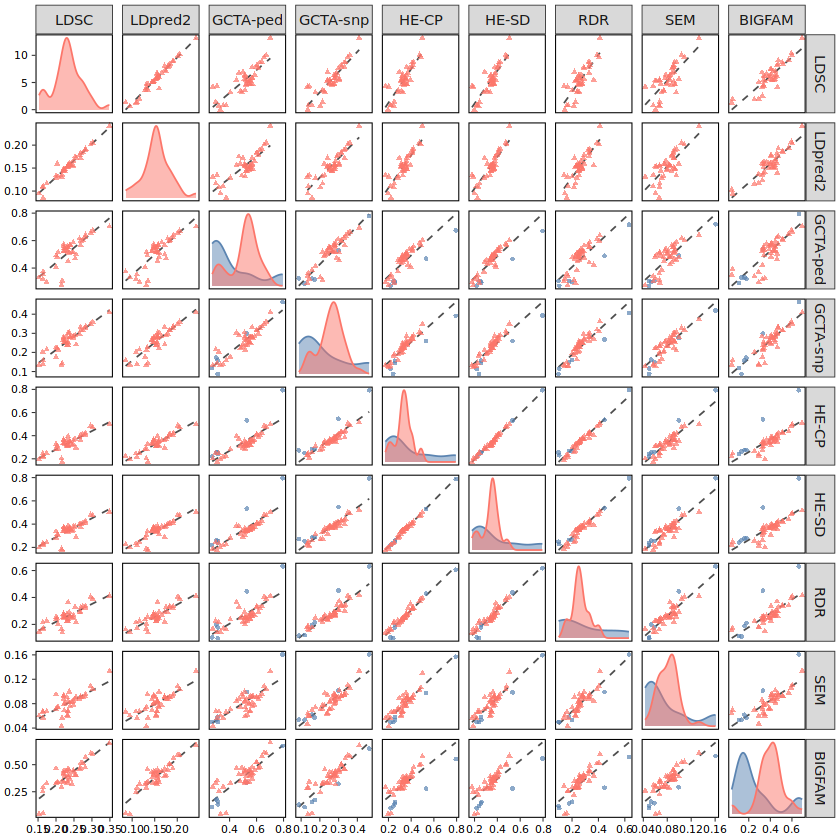

In [75]:
# # Custom density function for diagonal plots
# my_custom_density <- function(data, mapping, ...) {
#   ggplot(data = data) +
#     geom_density(aes(x = !!mapping$x, fill = cohort, color = cohort),
#                 alpha = 0.5) +
#     scale_fill_manual(values = c("GS" = "#5b84b1ff", "UKB" = "#fc766aff")) +
#     scale_color_manual(values = c("GS" = "#5b84b1ff", "UKB" = "#fc766aff"))
# }

# # Custom scatter function for off-diagonal plots
# my_custom_scatter <- function(data, mapping, ...) {
#   p <- ggplot(data = data) +
#     geom_smooth(aes(x = !!mapping$x, y = !!mapping$y),
#                method = "lm", 
#                color = "grey30", 
#                linetype = "dashed",
#                size = 0.5, 
#                alpha = 0.5,
#                se = FALSE) +
#     geom_point(aes(x = !!mapping$x, y = !!mapping$y,
#                    color = cohort, shape = cohort), 
#                size = 1, 
#                alpha = 0.7) +
#     scale_color_manual(values = c("GS" = "#5b84b1ff", "UKB" = "#fc766aff")) +
#     scale_x_continuous(n.breaks = 4) +  # x축 tick 개수를 4개로 조정
#     scale_y_continuous(n.breaks = 4)    # y축 tick 개수를 4개로 조정
#   p
# }

# # pairs plot 생성
# pairs_plot <- ggpairs(
#   for_plot,
#   columns = method_names,
#   aes(color = cohort, shape = cohort),
#   upper = list(continuous = wrap(my_custom_scatter)),
#   lower = list(continuous = wrap(my_custom_scatter)),
#   diag = list(continuous = wrap(my_custom_density))
# ) + 
#   theme_bw() +
#   get_nature_theme() +
#   theme(
#     legend.position = "right",
#     legend.title = element_text(size = 7.5),
#     legend.text = element_text(size = 6.5),
#     legend.key.size = unit(0.5, "cm")
#   )

# # 플롯 출력
# print(pairs_plot)

Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 49 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 54 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 68 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 41 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 81 rows containing missing va

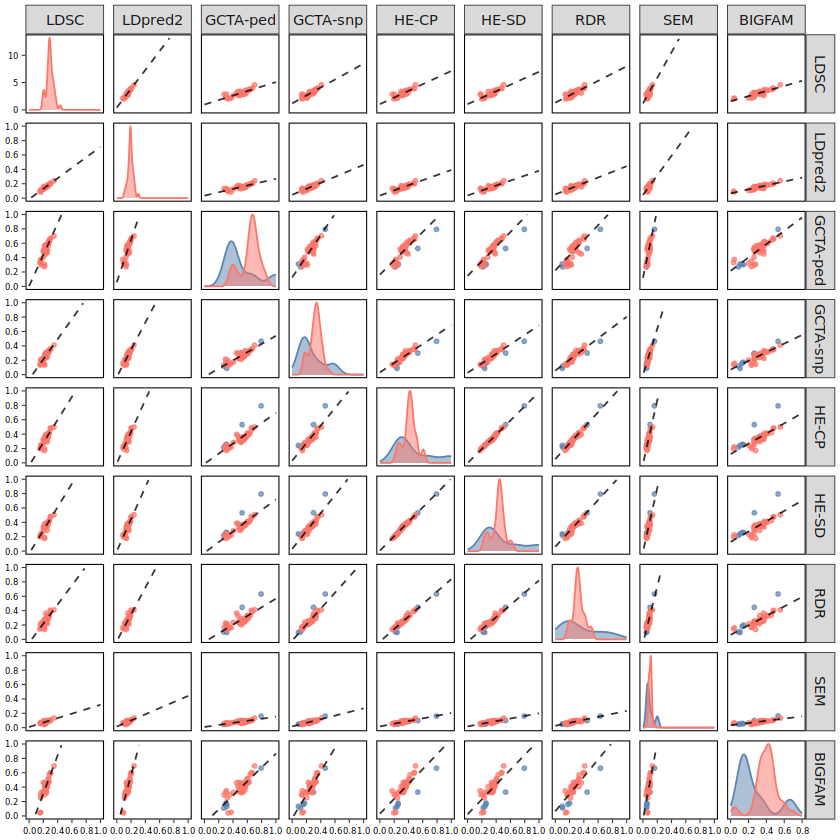

In [76]:
# 전체 데이터의 범위 계산
value_range <- range(as.matrix(for_plot[, ..method_names]), na.rm = TRUE)
axis_limits <- c(floor(value_range[1] * 10) / 10, 
                ceiling(value_range[2] * 10) / 10)

# tick 위치 설정 (4-5개 정도로 조정)
axis_breaks <- pretty(axis_limits, n = 4)

# Custom density function for diagonal plots
my_custom_density <- function(data, mapping, ...) {
  ggplot(data = data) +
    geom_density(aes(x = !!mapping$x, fill = cohort, color = cohort),
                alpha = 0.5) +
    scale_fill_manual(values = c("GS" = "#5b84b1ff", "UKB" = "#fc766aff")) +
    scale_color_manual(values = c("GS" = "#5b84b1ff", "UKB" = "#fc766aff")) +
    scale_x_continuous(limits = axis_limits, breaks = axis_breaks)
}

my_custom_scatter <- function(data, mapping, ...) {
  # 변수명 추출
  x_var <- rlang::as_label(mapping$x)
  y_var <- rlang::as_label(mapping$y)
  
  # NA가 아닌 데이터만 선택
  model_data <- data.frame(
    x = data[[x_var]],
    y = data[[y_var]],
    cohort = data$cohort
  ) %>% 
  na.omit()  # NA 제거
  
  # 데이터가 1개 이상인 경우에도 회귀선 그리기 (조건 완화)
  has_enough_data <- nrow(model_data) >= 1
  
  if(has_enough_data) {
    # 회귀 모델 생성
    model <- lm(y ~ x, data = model_data)
    
    # 예측을 위한 새로운 데이터 (더 많은 포인트로 부드러운 선 생성)
    new_data <- data.frame(x = seq(0, 1, length.out = 100))
    predicted <- predict(model, newdata = new_data)
    new_data$y <- predicted
    
  }
  
  p <- ggplot(data = model_data) +
    # 산점도
    geom_point(aes(x = x, y = y,
                   color = cohort),
               size = 1,
               alpha = 0.7)
  
  # 데이터가 있는 경우 회귀선 추가
  if(has_enough_data) {
    p <- p + geom_line(data = new_data,
                       aes(x = x, y = y),
                       color = "black",
                       linetype = "dashed",
                       size = 0.5,
                       alpha = 0.8)
  }
  
  p + scale_color_manual(values = c("GS" = "#5b84b1ff", "UKB" = "#fc766aff")) +
    scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2)) +
    scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2)) +
    labs(x = x_var, y = y_var)
}

# pairs plot 생성
pairs_plot <- ggpairs(
  for_plot,
  columns = method_names,
  aes(color = cohort),
  upper = list(continuous = wrap(my_custom_scatter)),
  lower = list(continuous = wrap(my_custom_scatter)),
  diag = list(continuous = wrap(my_custom_density))
) + 
  theme_bw() +
  get_nature_theme() +
  theme(
    legend.position = "right",
    legend.title = element_text(size = 7.5),
    legend.text = element_text(size = 6.5),
    legend.key.size = unit(0.5, "cm"),
    axis.text = element_text(size = 5)  # 축 텍스트 크기도 조정
  )

# 플롯 출력
print(pairs_plot)


In [77]:
# 저장하기
ggsave(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/other-methods-pairs.pdf",
    plot = pairs_plot,
    width = 177,
    height = 177,
    dpi = 300,
    units = "mm"
)

Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 49 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 54 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 68 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 41 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 26 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 81 rows containing missing va